The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\My DS Projects\Hamoye internship\datasets\energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.shape

(19735, 29)

In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [25]:
rename_column= {'date':'Date','Appliances':'Appliances','lights':'lights','T1': 'Temperature in kitchen area'
                ,'RH_1':'Humidity in kitchen area','T2': 'Temperature in living room area'
                ,'RH_2': 'Humidity in living room area','T3':'Temperature in laundry room area'
                ,'RH_3':'Humidity in laundry room area','T4':'Temperature in office room','RH_4':'Humidity in office room'
                ,'T5':'Temperature in bathroom','RH_5':'Humidity in bathroom','T6':'Temperature outside the building'
                ,'RH_6':'Humidity outside the building','T7':'Temperature in ironing room','RH_7':'Humidity in ironing room'
                ,'T8':'Temperature in teenager room 2','RH_8':'Humidity in teenager room 2','T9':'Temperature in parents room'
                ,'RH_9':'Humidity in parents room','T_out':'Temperature outside','Press_mm_hg':'Pressure_mm_hg' 
                ,'RH_out': 'Humidity outside','Wind speed':'Wind speed','Visibility':'Visibility','Tdewpoint':'Tdewpoint'
                ,'rv1':'Random variable 1','rv2':'Random variable 2'}

In [28]:
new_df = df.rename(columns=rename_column)
new_df

,Date,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,...,Temperature in parents room,Humidity in parents room,Temperature outside,Pressure_mm_hg,Humidity outside,Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [31]:
new_df.dtypes

Date                                 object
Appliances                            int64
lights                                int64
Temperature in kitchen area         float64
Humidity in kitchen area            float64
Temperature in living room area     float64
Humidity in living room area        float64
Temperature in laundry room area    float64
Humidity in laundry room area       float64
Temperature in office room          float64
Humidity in office room             float64
Temperature in bathroom             float64
Humidity in bathroom                float64
Temperature outside the building    float64
Humidity outside the building       float64
Temperature in ironing room         float64
Humidity in ironing room            float64
Temperature in teenager room 2      float64
Humidity in teenager room 2         float64
Temperature in parents room         float64
Humidity in parents room            float64
Temperature outside                 float64
Pressure_mm_hg                  

In [32]:
new_df.isnull().sum()

Date                                0
Appliances                          0
lights                              0
Temperature in kitchen area         0
Humidity in kitchen area            0
Temperature in living room area     0
Humidity in living room area        0
Temperature in laundry room area    0
Humidity in laundry room area       0
Temperature in office room          0
Humidity in office room             0
Temperature in bathroom             0
Humidity in bathroom                0
Temperature outside the building    0
Humidity outside the building       0
Temperature in ironing room         0
Humidity in ironing room            0
Temperature in teenager room 2      0
Humidity in teenager room 2         0
Temperature in parents room         0
Humidity in parents room            0
Temperature outside                 0
Pressure_mm_hg                      0
Humidity outside                    0
Windspeed                           0
Visibility                          0
Tdewpoint   

In [33]:
new_df.duplicated().sum()

0

In [34]:
new_df.describe()

,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,...,Temperature in parents room,Humidity in parents room,Temperature outside,Pressure_mm_hg,Humidity outside,Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [35]:
new_df.corr()

,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,...,Temperature in parents room,Humidity in parents room,Temperature outside,Pressure_mm_hg,Humidity outside,Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Temperature in kitchen area,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Humidity in kitchen area,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Temperature in living room area,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windspeed,0.087122,0.060281,-0.087654,0.204932,0.052495,0.069190,-0.100776,0.263188,-0.185747,0.300192,...,-0.177756,0.238655,0.192936,-0.235032,-0.176458,1.000000,-0.007516,0.125972,-0.011342,-0.011342
Visibility,0.000230,0.020038,-0.076210,-0.021057,-0.069721,-0.005368,-0.102310,0.017041,-0.104768,0.002636,...,-0.103915,0.008667,-0.077367,0.040315,0.083125,-0.007516,1.000000,-0.042190,-0.005889,-0.005889
Tdewpoint,0.015353,-0.036322,0.571309,0.639106,0.582602,0.499152,0.645886,0.414387,0.519471,0.616509,...,0.581483,0.540328,0.790661,-0.244098,0.036506,0.125972,-0.042190,1.000000,-0.003943,-0.003943
Random variable 1,-0.011145,0.000521,-0.006203,-0.000699,-0.011087,0.006275,-0.005194,-0.000477,-0.001815,-0.001787,...,-0.001227,-0.002955,-0.015216,0.000699,0.020441,-0.011342,-0.005889,-0.003943,1.000000,1.000000


In [37]:
new_df.dtypes

Date                                 object
Appliances                            int64
lights                                int64
Temperature in kitchen area         float64
Humidity in kitchen area            float64
Temperature in living room area     float64
Humidity in living room area        float64
Temperature in laundry room area    float64
Humidity in laundry room area       float64
Temperature in office room          float64
Humidity in office room             float64
Temperature in bathroom             float64
Humidity in bathroom                float64
Temperature outside the building    float64
Humidity outside the building       float64
Temperature in ironing room         float64
Humidity in ironing room            float64
Temperature in teenager room 2      float64
Humidity in teenager room 2         float64
Temperature in parents room         float64
Humidity in parents room            float64
Temperature outside                 float64
Pressure_mm_hg                  

In [38]:
#We need to drop light and date since they are not float
new_df = new_df.drop(columns=['Date','lights'])

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
df_features = df_normalized.drop(columns=['Appliances'])
target_appliance = df_normalized['Appliances']

In [44]:
df_features

,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,Temperature in bathroom,Humidity in bathroom,...,Temperature in parents room,Humidity in parents room,Temperature outside,Pressure_mm_hg,Humidity outside,Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, target_appliance, test_size=0.3, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [52]:
pred= model.predict(x_test)
pred

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
root_mean_sq_err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Square Error(RMSE):', round(root_mean_sq_err, 3))
mean_abs_err = mean_absolute_error(y_test, pred)
print('Mean Absolute Error:',mean_abs_err)
r_squared_err= r2_score(y_test, pred)
print('R-squared:', round(r_squared_err, 2))
sum_of_square_residual = np.sum(np.square(y_test - pred))
print('Sum of square residuals:', round(sum_of_square_residual, 2))

Root Mean Square Error(RMSE): 0.088
Mean Absolute Error: 0.05013362397742957
R-squared: 0.15
Sum of square residuals: 45.35


In [55]:
round(mean_abs_err,2)

0.05

In [72]:
for item in model.coef_:
    print(round(item,3))
    


-0.003
0.554
-0.236
-0.457
0.291
0.096
0.029
0.026
-0.016
0.016
0.236
0.038
0.01
-0.045
0.102
-0.158
-0.19
-0.04
-0.322
0.007
-0.078
0.029
0.012
0.118
0.001
0.001


In [77]:
model.coef_.max().round(2)

0.55

In [78]:
model.coef_.min().round(2)

-0.46

In [79]:
model.intercept_.round(2)
    

0.15

In [80]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.4)
ridge_regression.fit(x_train, y_train)

pred2 = ridge_regression.predict(x_test)

In [81]:
pred2

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [82]:
root_mean_sq_err = np.sqrt(mean_squared_error(y_test, pred2))
print('Root Mean Square Error(RMSE):', round(root_mean_sq_err, 3))
mean_abs_err = mean_absolute_error(y_test, pred2)
print('Mean Absolute Error:',mean_abs_err)
r_squared_err= r2_score(y_test, pred2)
print('R-squared:', round(r_squared_err, 2))
sum_of_square_residual = np.sum(np.square(y_test - pred2))
print('Sum of square residuals:', round(sum_of_square_residual, 2))

Root Mean Square Error(RMSE): 0.088
Mean Absolute Error: 0.05008744584092387
R-squared: 0.15
Sum of square residuals: 45.37


In [83]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.001)
lasso_regression.fit(x_train, y_train)
pred3= lasso_regression.predict(x_test)

In [84]:
pred3

array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

In [86]:
root_mean_sq_err = np.sqrt(mean_squared_error(y_test, pred3))
print('Root Mean Square Error(RMSE):', round(root_mean_sq_err, 3))
mean_abs_err = mean_absolute_error(y_test, pred3)
print('Mean Absolute Error:',mean_abs_err.round(3))
r_squared_err= r2_score(y_test, pred3)
print('R-squared:', round(r_squared_err, 2))
sum_of_square_residual = np.sum(np.square(y_test - pred3))
print('Sum of square residuals:', round(sum_of_square_residual, 2))

Root Mean Square Error(RMSE): 0.094
Mean Absolute Error: 0.055
R-squared: 0.03
Sum of square residuals: 51.85


In [88]:
lasso_regression.coef_.round(3)

array([ 0.   ,  0.018,  0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.05 ,  0.003,  0.   ,  0.   ,
       -0.   , -0.   ])

In [90]:
lasso_regression.intercept_.round(3)

0.111

In [112]:
x_train, x_test, y_train, y_test = train_test_split(df_features['Temperature in living room area'].values.reshape(-1,1), 
                                                    df_features['Temperature outside the building'].values.reshape(-1,1), 
                                                    test_size=0.3, random_state=42)
model.fit(x_train, y_train)
pred4=model.predict(x_test)

In [113]:
pred4

array([[0.23928945],
       [0.46794238],
       [0.23108472],
       ...,
       [0.3001772 ],
       [0.4297256 ],
       [0.3217686 ]])

In [115]:
root_mean_sq_err = np.sqrt(mean_squared_error(y_test, pred4))
print('Root Mean Square Error(RMSE):', round(root_mean_sq_err, 3))
mean_abs_err = mean_absolute_error(y_test, pred4)
print('Mean Absolute Error:',mean_abs_err.round(3))
r_squared_err= r2_score(y_test, pred4)
print('R-squared:', round(r_squared_err, 2))
sum_of_square_residual = np.sum(np.square(y_test - pred4))
print('Sum of square residuals:', round(sum_of_square_residual, 2))

Root Mean Square Error(RMSE): 0.106
Mean Absolute Error: 0.082
R-squared: 0.64
Sum of square residuals: 66.12


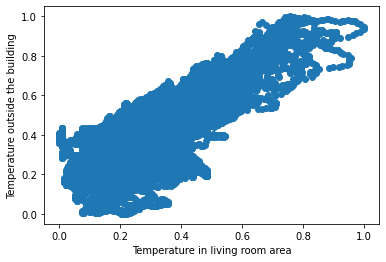

In [117]:
plt.scatter(df_features['Temperature in living room area'], 
                                                    df_features['Temperature outside the building'])
plt.xlabel('Temperature in living room area')
plt.ylabel('Temperature outside the building')
plt.show()

In [119]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[0.8910771]]
Intercept:  [0.13176428]
